# Mean-field theory for cerebral cortex

This script performs a fit of the transfer function mean-field of an
excitatory and an inhibitory population of adaptive integrate and fire model neurons 
simulated in _"fitTFclean"_

## References

.. [1]  M.Di Volo and A. Destexhe, "Biologically Realistic Mean-Field Models of Conductance-Based Networks of Spiking Neurons with Adaptation", Neural Comput 31:653-680

.. [2] Y. Zerlaut, B. Telenczuk, C. Deleuze, T. Bal, G. Ouanounou and A. Destexhe, "Heterogeneous firing rate response of mouse layer V pyramidal neurons in the fluctuation-driven regime", J Physiol 594.13 (2016) pp 3791–3808

## initiation and preparation
___

This part is responsible for loading the parameters of various cells that make up the cellular input-output function of a cortical or thalamic neuron. In other words, it handles the function that connects the presynaptic variables (ve, vi) to the probability of the neuron firing, which is known as the neuron's transfer function (following Zerlaut et al., 2016 [2]). The transfer function can be written as νout = F(νe, νi).
The underlying concept of this approach is based on the observation that action potentials are initiated near the soma at the axon initial segment. These action potentials can cause fluctuations in the soma, which in turn influence the firing rate of the neuron. To capture this phenomenon, we consider both the input firing rate and the adaptation current w, which affects the voltage dynamics of the neuron.
The hypothesis is that the neuron's output firing rate can be described as a function of voltage dynamic fluctuations, including the average subthreshold voltage µv, its standard deviation σV, and its time correlation decay time τv.
Consequently, we proceed to illustrate the relationship between the presynaptic variables (input) and the firing rate response (output) through a series of sequential steps. The first step consists of evaluating the firing rate response when we increase the excitation at a fixed inhibition, i.e., the synaptic integration.
The second step is similar, but in 3D, and includes the inhibition as a variable. The third step is like the previous one, but it is a 2D numerical transfer function template with just the excitatory component (FE).
Finally, we load the parameters of the cell.

#### Definition :
- ve is the presynaptic excitatory input firing rate 
- vi is the presynaptic inhibitory input firing rate
- vout is the predicted firing rate of the neuron in response of a stimulation according to the transfer function
- Fe: Firing rate of excitatory inputs.
- Fi: Firing rate of inhibitory inputs.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, erfcinv
from scipy.optimize import minimize

from mpl_toolkits.mplot3d import Axes3D
from cell_library import loadparams

In [98]:
TC = np.load('data\\ExpTF_exc_Nstp40_new.npy').T
RE = np.load('data\\ExpTF_inh_Nstp40_new.npy').T
ve = np.linspace(0, 40, 40)
vi = np.linspace(0, 170, 40)

vve, vvi = np.meshgrid(ve, vi)

TC stands for thalamocortical cell, and RE stands for thalamo-reticular cell. This assigns specific sets of cellular and synaptic parameters to the elements TC and RE (transposition is used to ensure the correct dimension).

Different cells can be load by changing the value contains in the function np.load
##### Thalamus :
- **Loading thalamocorticall cell parameters TC** : data\\ExpTF_exc_Nstp40_new.npy
- **Loading thalamo-reticular cell parameters RE** : data\\ExpTF_inh_Nstp40_new.npy

##### Cortex :
- **Loading regular-spiking cell parameters RS** : data\\ExpTF_cortex_exc_Nstp20.npy 
- **Loading fast-spiking cell parameters FS** : data\\ExpTF_cortex_inh_Nstp20.npy 

#### Definition :
##### Thalamus :
- **Thalamocortical cell TC** = Excitatory thalamocortical cells release the neurotransmitter glutamate at their synapses, which activates receptors on the postsynaptic neurons in the cortex. This excitation facilitates the transmission of signals and contributes to the integration and processing of sensory information in the cortical regions.
- **Thalamo-reticular cell RE** = A thalamo-reticular cell is a type of inhibitory neuron located in the thalamic reticular nucleus (TRN). RE cells receive inputs from various sources, including the thalamus itself and cortical regions, and send inhibitory projections back to the thalamus. These neurons play a crucial role in regulating the flow of information through the thalamus and the transmission of signals between the thalamus and the cortex.

##### Cortex :
- **Regular-spiking cell RS** =  It is a type of neuron that exhibits a specific firing pattern characterized by regular, repetitive action potentials or spikes in response to incoming stimuli or depolarization. This firing pattern is typically observed in excitatory neurons within the central nervous system, including the cerebral cortex.

- **Fast-spiking cell FS** = It is a type of neuron that exhibits a specific firing pattern characterized by high-frequency, rapid bursts of action potentials or spikes. These neurons are typically inhibitory interneurons found in various regions of the central nervous system, including the cerebral cortex and hippocampus.


Text(0, 0.5, 'vout TC')

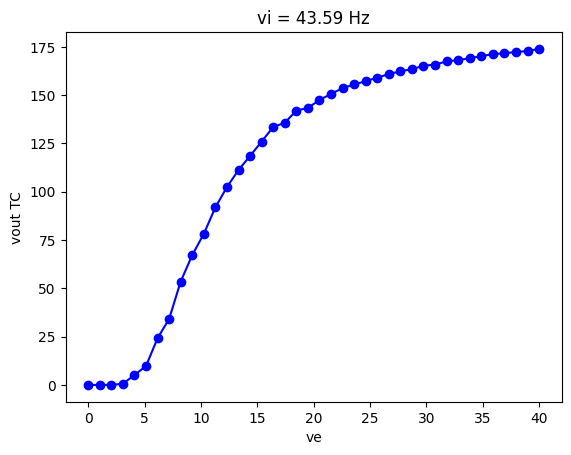

In [99]:
i = 10 # choose inhibitory input

plt.plot(ve, TC[i], '-ob')
plt.title(f'vi = {vi[i]:.2f} Hz')
plt.xlabel('ve')
plt.ylabel('vout TC')

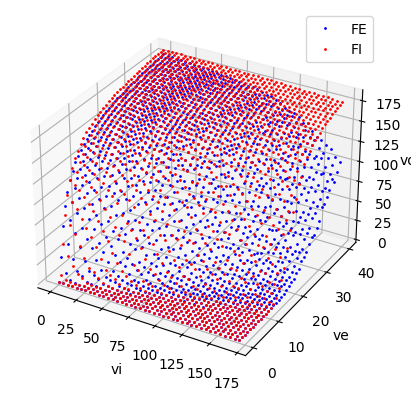

In [100]:
ax = plt.axes(projection='3d')
ax.plot3D(vvi.flatten(), vve.flatten(), TC.flatten(), 'ob', markersize=1,label='FE')
ax.plot3D(vvi.flatten(), vve.flatten(), RE.flatten(), 'or', markersize=1,label='FI')

ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')
ax.legend();

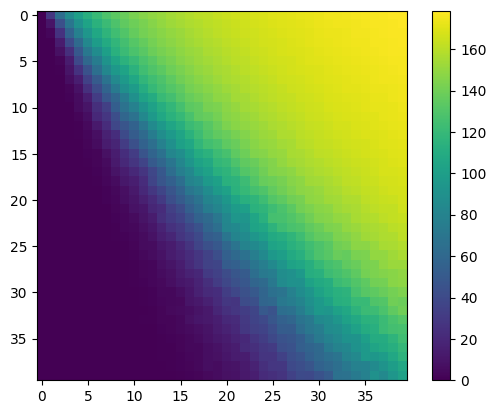

In [101]:
plt.imshow(TC)
plt.colorbar()

In [29]:
params = loadparams('cortex')

Return a dictionary containing parameters for different scenarios. You can change the scenario by modifying the value within the function.

- thaco_spont-osc is for the thalamus and the cortex and contain parameters of RS, FS, TC, and RE cells.
- thalamus_ACh is for the thalamus and implies the Ach role
- thalamus_control is for the.........
- thalamus_Wolfart is for the thalamus and account the wolfart inputs
- thalamus_noadapt is for the thalamus and did not implies the adaptation

- cortex is for the cortex following the Di Volo paper [^1]
- cortex_updown is for the cortex and adding the up and down states

In [31]:
params['RS']

{'P': array([-0.0473077 ,  0.00168071,  0.00097111, -0.00346337,  0.000475  ,
        -0.00167624, -0.00645524,  0.00343409, -0.00114066,  0.00018571]),
 'Nexc': 800,
 'Ninh': 25,
 'Qe': 1e-09,
 'Qi': 6e-09,
 'Cm': 1.6e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.2,
 'a': 0,
 'b': 1e-11,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

Access the parameters we need from the dictionary and load them using a key, in this case, 'RS'.

## theory and functions
___

$ \mu_{Ge}(\nu_e,\nu_i)=\nu_eK_e\tau_eQ_e $                                              # Equation 1.1

$ \mu_{Gi}(\nu_e,\nu_i)=\nu_iK_i\tau_iQ_i $                                              # Equation 1.2

$ \mu_G(\nu_e,\nu_i)=\mu_{Ge}+\mu_{Gi}+g_L $                                               #Equation 2

$ \tau_m^\text{eff}(\nu_e,\nu_i)=\frac{C_m}{\mu_G} $                                                     #Equation 3

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-w}{\mu_G} $                                                 #Equation 4.1

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-\nu_\text{out}\tau_wb+aE_L}{\mu_G+a} $                                            #Equation 4.2

$ \sigma_V(\nu_e,\nu_i)=\sqrt{\sum_sK_s\nu_s\frac{(U_s\cdot\tau_s)^2}{2(\tau_m^\text{eff}+\tau_s)}} $                     #Equation 5

$ \tau_V(\nu_e,\nu_i)=\left(\frac{\sum_sK_s\nu_s(U_s\cdot\tau_s)^2} {\sum_sK_s\nu_s(U_s\cdot\tau_s)^2/(\tau_m^\text{eff}+\tau_s)}\right) $                                                   #Equation 6.1

$ U_s=\frac{Q_s}{\mu_G}(E_s-\mu_V) $                                                                                  #Equation 6.2

$ \nu_\text{out}=\frac{1}{2\tau_V}\cdot\text{Erfc}\left(\frac{V_\text{thr}^\text{eff}-\mu_V}{\sqrt{2}\sigma_V}\right) $                                                                            #Equation 7.1

$ V_\text{thr}^\text{eff}(\mu_V,\sigma_V,\tau_V^N)=P_0+\sum_{x\in\{\mu_V,\sigma_V,\tau_V^N\}}P_x\cdot\left(\frac{x-x^0}{\delta x^0}\right)+\sum_{x,y\in\{\mu_V,\sigma_V,\tau_V^N\}^2}P_{xy}\cdot\left(\frac{x-x^0}{\delta x^0}\right)\left(\frac{y-y^0}{\delta y^0}\right) $                                                                                                        #Equation 7.2

$ \text{MPF}:(\nu_e,\nu_i)\longrightarrow(\mu_V,\sigma_V,\tau_V,\tau_V^N) $                                                                            #Equation 8

When we want to study the transfer transfer, we translate the variables ve, vi into the stationary fluctuations properties (μV,σV,τV), and with either the membrane parameters (gL, EL, τeffm) and connection parameters (Qe, Ke) including adaptation (a,b,τw), the tranfer function translate it into spiking probability.
The calculation of μV,σV,τV is then important for study this function.
We suppose that the spikes follow a poissonian statistics, one excitatory and one onhibitory that are both convoluted with an exponential waveform to produce the synaptic conductance time courses.


#### Definition :
- **Poissonian statistics** = Mathematical model that describes the behavior of events that occur randomly and independently in time or space. Events are considered to be discrete, independent and occur at a constant average rate, but the exact timing or location of each event is unpredictable. Eliciting a spike at t with a probability v(t) dt

##### Equation 1 and 1.1
- **µGe or µGi** stands for the average conductance of the target population (excitation or inhibition). It represents the membrane's capacity to store and receive electrical charge at a specific potential, which is influenced by the rate of synaptic bombardment from the presynaptic neurons, the number of synapses, and the duration of the activity.

- **Ke, Ki** stands for the excitory and inhibitory connections onto a neuron. Therefore, the probability to make a connection and the number of neuron that could make those connection Kµ = pNµ

- **Qe, Qi**: excitatory and inhibitory quantal conductance. It refers to the conductance change produced by the opening of a single ion channel. Each time an ion channel opens, it produces a discrete conductance change, which is the quantal conductance. The quantal conductance is determined by various factors, including the ion species, the specific ion channel involved, and the membrane potential

- **τe, τi**: decay timescale of excitatory or inhibitory synapses. It is describing how fast the cell membrane potential responds to the flow of ion channel currents. So it is the time it takes for the postsynaptic response, such as the synaptic current or voltage, to decay or return to baseline following the arrival of a presynaptic action potential.


##### Equation 2
- **µG** is the global average conductance and then it is the sum of all the conductance from excitatory (µGe), inhibitory (µGi) and leak (gL).

##### Equation 3
- **τeffm** stands for the effective membrane time constant which is the time for the potential to decay to its "resting state" (or to a fraction like 63%) after having receved an input signal as a small negative current pulse.

- **cm** is the membrane capacitance, considered as a leaky capacitor owing to it lipidic membrane with pores, it determines the speed with which electrical signals propagate


##### Equation 4
- **µV** stands for the mean potential fluctuation which is the potential where the cell is fluctuating. It discribes the electrophysiologic dynamic in the cell, and the exchange of ion between the inner cell and it extracellular compartment.


##### Equation 5
- **σV** stands for the standard deviation of the mean fluctuation potential. It mesures the amount of variation or dispersion of the membrane fluctuation. The equation is described in zerlaut 2018 equation 15


##### Equation 6.1
- **τV** stands for the global autocorrelation decay time which translates the "coherence" between the distribution. It is a measure of how quickly the correlation between successive samples of a signal decreases as the time lag between the samples increases.


##### Equation 6.2
- **Us** stands the mean synaptic inputs

##### Equation 7.2
- **Veffthr** stands for the effective voltage membrane which mesures the average or overall voltage across the neuronal membrane that takes into account the contributions from various currents and synaptic inputs. The effective membrane voltage is determined by the balance between excitatory and inhibitory synaptic inputs, as well as the contribution of intrinsic currents. The effective membrane voltage is essential for determining the firing behavior and activity patterns of neurons. It affects the generation of action potentials, the integration of synaptic inputs, and the overall excitability of the neuron.

##### Equation 8
- It is a function **MPF** (Mean Potential Fluctuation) that calculate the fluctuation parameters based on the inputs

2.7 => 2.14  M.Di Volo and A. Destexhe, "Biologically Realistic Mean-Field Models of Conductance-Based Networks of Spiking Neurons with Adaptation", Neural Comput 31:653-680


In [79]:
def MPF(typ,fexc,finh,fout):

    p = params[ typ ]
    P,Nexc,Ninh,Qe,Qi,Cm,El = p.P,p.Nexc,p.Ninh,p.Qe,p.Qi,p.Cm,p.El
    a,b,Tw,Gl,Te,Ti,Ee,Ei = p.a,p.b,p.Tw,p.Gl,p.Te,p.Ti,p.Ee,p.Ei

    fexc[fexc<1e-9]=1e-9
    fe = fexc*Nexc
    finh[finh<1e-9]=1e-9
    fi = finh*Ninh


    muGi = Qi*Ti*fi                                             #Equation 1.1
    muGe = Qe*Te*fe                                             #Equation 1.2
    muG = Gl+muGe+muGi                                          #Equation 2
    muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a)    #Equation 4.2
    
    
    muGn = muG/Gl
    Tm = Cm/muG                                                 #Equation 3
    
    Ue =  Qe/muG*(Ee-muV)                                       #Equation 6.2
    Ui = Qi/muG*(Ei-muV)                                        #Equation 6.2

    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm))          #Equation 5

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) )   #Equation 6.1
    TvN = Tv*Gl/Cm

    return muV, sV, Tv, TvN

We define an MPF (Mean Potential Fluctuation) function that extracts various parameters of the cell from a dictionary called "params" using "typ" as the key to access a specific neuron. To avoid division by zero, we set the minimum values of "fexc" and "finh" to 1e-9.

This function calculates the fluctuations of voltage dynamics by evaluating the average subthreshold voltage (muV), standard deviation of voltage (sV), time correlation decay (Tv), and the normalized variance of the membrane potential (TvN).

#### Definition :
- fexc :Firing rate of an excitatory neuron
- finh : Firing rate of an inhibitory neuron
- fe: Total excitatory input 
- fi: Total inhibitory input

In [126]:
# test MPF function
typ = 'RS'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_TC: (ve=4, vi=30)Hz -> (mu=-50.52, sigma=4.50, tau=8.30)mV


We just test the functionnality of the function with randomn numbers belonging to this distribution.


In [103]:
#====== calculate MPF for RS/FS =======

#-choose here the neuron typ:
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

Allow to create a variable FF according the type of neuron resultant on spiking network and dynamically run code that stock the value of typ on FF

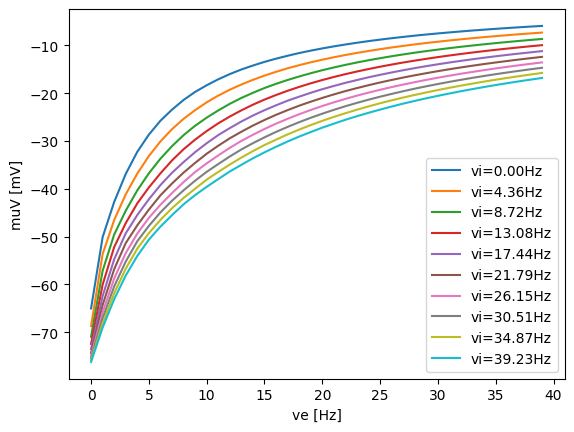

In [105]:
for i in range(10):
    plt.plot(muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

plt.xlabel('ve [Hz]')
plt.ylabel('muV [mV]')
plt.legend();

The mean potential fluctuation (µV) is plotted at different values of ve and vi. It can be observed that as ve increases, µV also increases. However, when vi increases, the rate of increase in µV becomes less pronounced (the impact is maximal at the beginning).
This observation is consistent with the equation for µV because as ve increases, µGe increases, which in turn increases µV. On the other hand, increasing vi leads to an increase in µGi. However, since Ei (the reversal potential for inhibitory synapses) is negative, an increase in µGi results in a decrease in µV.
In summary, increasing ve leads to an increase in µV, while increasing vi leads to a decrease in µV due to the negative reversal potential for inhibitory synapses.

In [106]:
def pheV(fout, muV, sV, Tv):
    fout[fout<0]=1e-9
    Tv[Tv<0]=1e-9
    return np.sqrt(2)*sV * erfcinv( 2*Tv*fout ) + muV # Zerlaut 2017
    # return np.sqrt(2)*sV * erfcinv( Tv*fout ) + muV # to widen the definition range

Here, we are calculating the phenomenological voltage pheV, which can be expressed as a function of the mean potential fluctuation, its standard deviation, and a related time constant.
The error function used in this calculation is bounded between 0 and 2. Values exceeding this range tend to approach infinity and therefore cannot be calculated. By removing the factor of 2 from this function, we expand the range of valid variables and allow for a wider range of inputs.
Additionally, this function cannot accept 0 as a value, which is why the minimum values for Tv and fout are set to 1e-9. This ensures that the function can be properly evaluated and avoids any potential division by zero errors.

Text(0, 0.5, 'Veff [mV]')

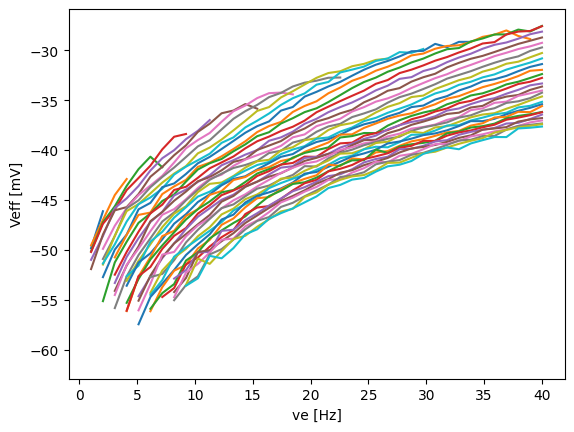

In [119]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

for i in range(len(vi)):
    plt.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

plt.xlabel('ve [Hz]')
plt.ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

In [128]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='TC': idx = '[15:38,8:35]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = TC{idx}")
exec(f"RE_fit = RE{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(23, 27)

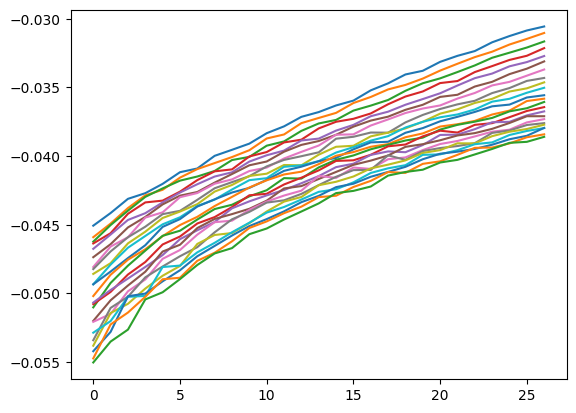

In [129]:
plt.plot(Veff_fit.T);

## fitting and results
___

#### fitting first order to find correct global minimum

In [135]:
# calculating the effective threshold potential with a general second order polynomial of the membrane moments (mu,sigma,tau)

def Vthre(P, muV, sV, TvN):
    # normalizing moments:
    muV0 = -60e-3;
    DmuV0 = 10e-3;
    sV0 = 4e-3;
    DsV0 = 6e-3;
    TvN0 = 0.5;
    DTvN0 = 1.;
    
    # first order polynomial
    Vo1 = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0
    # second order polynomial
    Vo2 = P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0  + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);

    return Vo1 + Vo2
    

In [153]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', tol=1e-32, options={'disp':True,'maxiter':20000})

P1 = np.array(res.x)
print(P1)

[-0.05330784  0.0051353   0.00636002 -0.03086307]


C:\Users\jover\AppData\Local\Temp\ipykernel_9208\1219303345.py:5: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


This function calculates the difference between the observed data and the data predicted by the transfer function.
Function "Res" return the square of the differences allowing to have an ajustment of the data. 
We try to find the best parameter "P" which minimize the function, here we use the "nelder-mead" method. 
The best parameters are then extracted in "P1"

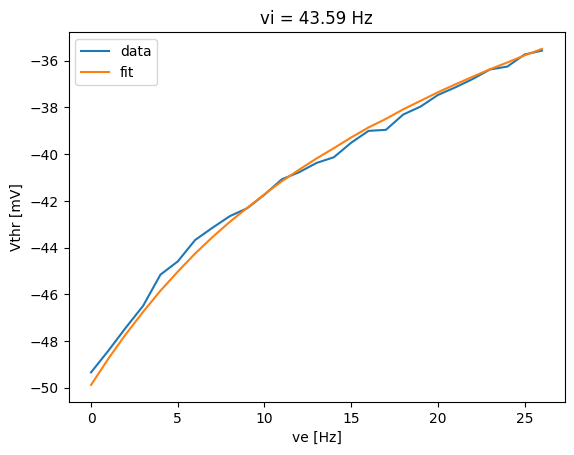

In [154]:
# checking the fit...

# choose vi:
i=10

plt.title(f'vi = {vi[i]:.2f} Hz')

plt.plot(Veff_fit[i]*1e3, label='data')
plt.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)[i]*1e3, label='fit')
plt.xlabel('ve [Hz]')
plt.ylabel('Vthr [mV]')
plt.legend();


___
skippable 

In [155]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1332
         Function evaluations: 2202
[ 2.12321162e-05 -5.51879833e-03  4.75010955e-03 -1.24710725e-02
 -1.17091516e-02  2.03790312e-02]


In [156]:
P = np.concatenate([P1,P2])

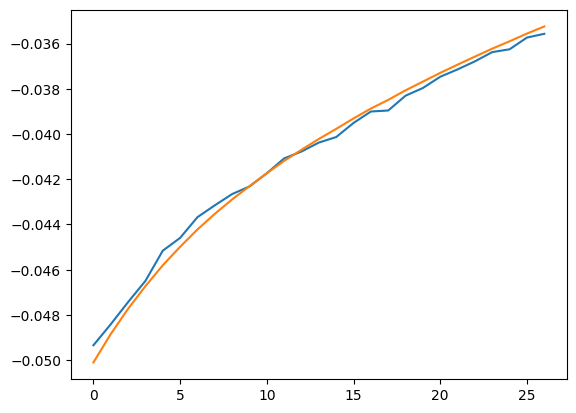

In [158]:
i =10
plt.plot(Veff_fit[i])
plt.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i])

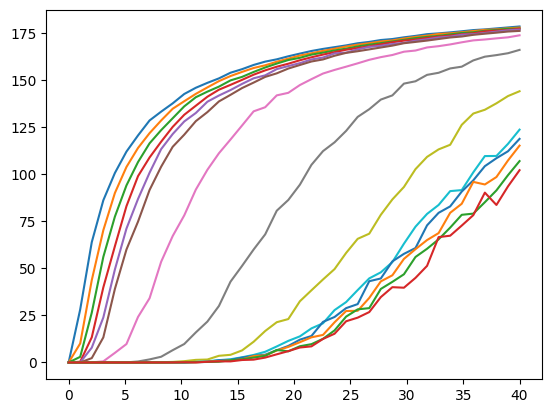

In [163]:
# choose a subspace to fit the firing rate and transfer function ( not necessary BUT produces better results most of the time )
# IMPPORTANT if a subspace in firing rate input is more interesting or badly fitted without doing this ...

red = [0,5,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,30,39]
# rid = [0,20,30,35,36,37,38,39]
rid = [0,1,2,3,4,5,10,20,30,35,36,37,38,39]
# rid = [0,1,2,3,4,5,6,7,8,9,10]

plt.plot(ve,FF[rid].T);

Red and Rid allow to range the subspace with the best results

skippable
___

In [164]:
# the transfer function
def TF(P, muV, sV, Tv, TvN):
    fout = 1/(2*Tv) * erfc( (Vthre(P, muV, sV, TvN) - muV)/(np.sqrt(2)*sV) )     #Equation 7.1
    
    # fout = np.where(fout<0, 1e-9, fout)
    fout[fout<0]=0
    return fout

In [165]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[-0.04889066  0.00286456  0.00257743 -0.00410812  0.00032246 -0.00239454
 -0.00464647  0.00068987  0.00520023  0.00263891]


C:\Users\jover\AppData\Local\Temp\ipykernel_9208\818737715.py:6: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [166]:
TF(PP, muV, sV, Tv, TvN)[10]

array([8.10674165e-237, 1.89975196e-011, 8.83455573e-004, 2.34357773e-001,
       2.78624696e+000, 1.07442153e+001, 2.25387825e+001, 3.77543668e+001,
       5.17880862e+001, 6.64085708e+001, 8.02878250e+001, 9.21064266e+001,
       1.02853201e+002, 1.12269233e+002, 1.20418750e+002, 1.27284454e+002,
       1.33084005e+002, 1.38328689e+002, 1.42532004e+002, 1.46329206e+002,
       1.49461915e+002, 1.52190987e+002, 1.54559641e+002, 1.56648260e+002,
       1.58484829e+002, 1.60108751e+002, 1.61555549e+002, 1.62859140e+002,
       1.64039439e+002, 1.65109038e+002, 1.66094552e+002, 1.66996644e+002,
       1.67835332e+002, 1.68614099e+002, 1.69340858e+002, 1.70022695e+002,
       1.70665437e+002, 1.71272024e+002, 1.71846576e+002, 1.72391676e+002])

vi = 87.18Hz


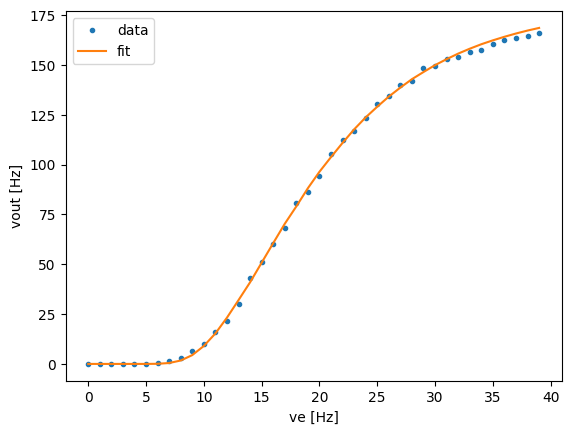

In [179]:
# compare fit

# choose vi...
i =20

print(f'vi = {vi[i]:.2f}Hz')

plt.plot(FF[i], 'o', ms=3, label='data')
plt.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

plt.xlabel('ve [Hz]')
plt.ylabel('vout [Hz]')
plt.legend();


In [79]:
#===== SAVE fitted parameters ======

np.save(f'data\\FITparams_{typ}_exp.npy', PP)

___
___
#### END (other ideas stuff beyond here + unimaginable horrors beyond your imagination)
___
___

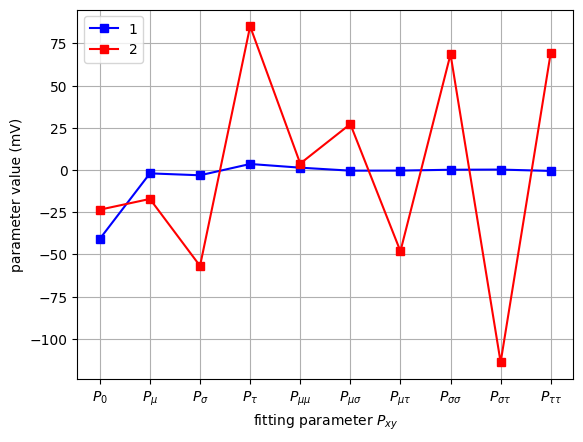

In [25]:
# pZ=np.load("C:\VSCode\DB_comparison\mf\data\FS-cell_CONFIG1_fit.npy")[[0,1,2,3,5,8,9,6,10,7]]
pppp2=np.load('data\\NEW6params_RE.npy')*1e3
pppp3=np.load('data\\NEW5params_RE.npy')*1e3
# pppp2=np.load('data\\NEW4params_RE.npy')
# pppp3=np.load('data\\NEW6params_RE.npy')
plt.plot(pppp2,'s-b',label='1')
plt.plot(pppp3,'s-r',label='2')
labels = ['$P_0$','$P_{\mu}$','$P_{\sigma}$','$P_{\\tau}$' , '$P_{\mu\mu}$','$P_{\mu\sigma}$','$P_{\mu\\tau}$','$P_{\sigma\sigma}$','$P_{\sigma\\tau}$','$P_{\\tau\\tau}$']
plt.xticks(range(len(labels)),labels);
plt.ylabel('parameter value (mV)')
plt.xlabel('fitting parameter $P_{xy}$')
plt.grid()
plt.legend()
# plt.savefig('gfx\\fitparams.png',dpi=200,bbox_inches='tight')

___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from mytools import ornstein_uhlenbeck

In [3]:
typ='TC'
PP = np.load(f'data\\NEW6params_{typ}.npy')

In [4]:
def TF2(P,fexc,finh,adapt, Nexc,Ninh,Qe,Qi,Cm,El, noise=1):

    fe = fexc*Nexc
    fi = finh*Ninh

    fe+=1e-9;
    fi+=1e-9;
    
    muGi = Qi*Ti*fi;
    muGe = Qe*Te*fe;
    muG = Gl+muGe+muGi;
    muV = (muGe*Ee+muGi*Ei+Gl*El-adapt)/muG;
    # muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a);
    
    
    muGn = muG/Gl;
    Tm = Cm/muG;
    
    Ue =  Qe/muG*(Ee-muV);
    Ui = Qi/muG*(Ei-muV);
    
    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm));

    sV*=noise
    
    
    fe+=1e-9;
    fi+=1e-9;

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) );
    TvN = Tv*Gl/Cm;
    
    muV0=-60e-3;
    DmuV0 = 10e-3;
    sV0 =4e-3;
    DsV0= 6e-3;
    TvN0=0.5;
    DTvN0 = 1.;

    vthre = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0 \
    + P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0 + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);


    frout = 1/(2*Tv) * erfc( (vthre - muV)/(np.sqrt(2)*sV) )
    
    return frout;

Gl=10*1.e-9
Tw=200*1.e-3
b=0.01*1e-9

Ti=5*1.e-3
Te=5*1.e-3
Ee=0
Ei=-80*1.e-3

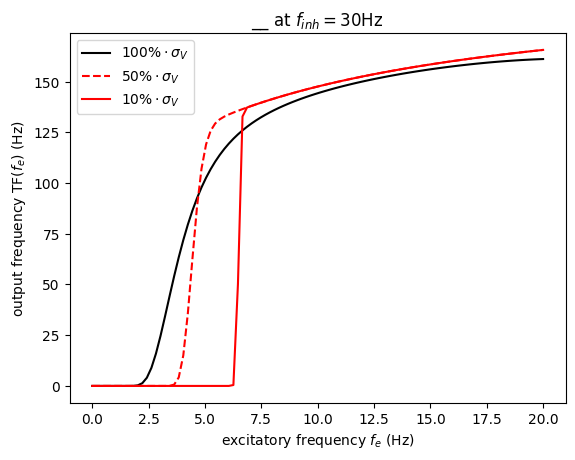

In [25]:
fe = np.linspace(0,20,100)
fi = 30
if typ=='TC':
    fout1 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.3)
    fout3 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.1)
# PP2=PP.copy()
# PP2[2] = RE[2]
# PP2[5]*=2
# PP2[8] = RE[8]
# PP2[9] = RE[9]
if typ=='RE':
    fout1 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.5)
    fout3 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.1)

plt.plot(fe,fout1,'black', label='$100\%\cdot\sigma_V$')
plt.plot(fe,fout2,'--r', label='$50\%\cdot\sigma_V$')
plt.plot(fe,fout3,'r', label='$10\%\cdot\sigma_V$')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title("__ at $f_{inh}=30$Hz");
# plt.savefig("NoiseTF_TC_new.png", dpi=250)

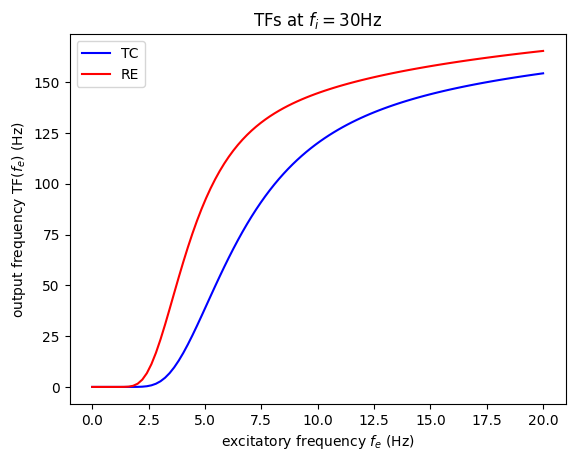

In [19]:
fe = np.linspace(0,20,100)
fi = 30
fout1 = TF2(np.load('data\\NEW6params_TC.npy'),fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
fout2 = TF2(np.load('data\\NEW6params_RE.npy'),fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)

plt.plot(fe,fout1,'b', label='TC')
plt.plot(fe,fout2,'r', label='RE')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title(f"TFs at $f_i=30$Hz");
# plt.savefig("TF.png", dpi=250)

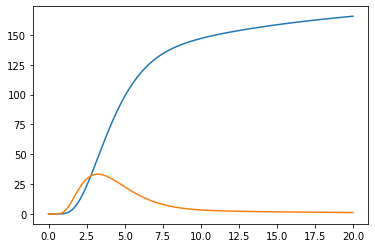

In [8]:
fe = np.linspace(0,20,100)
fi = 30
# plt.plot(fi,TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))
plt.plot(fe,TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))

def der(fe,fi,dfe=1e-5,dfi=0):
    # return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))/(dfe+dfi)
    return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))/(dfe+dfi)
plt.plot(fe,der(fe,fi))